In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def show_result(x, y, pred_y, losses) :
    # ground truth
    plt.subplot(1, 3, 1)
    plt.title('Ground truth', fontsize = 18)
    plt.xlabel("x", fontsize = 12)
    plt.ylabel("y", fontsize = 12)
    for i in range(x.shape[0]) :
        if y[i] == 0 :
            plt.plot(x[i][0], x[i][1], 'ro')
        else :
            plt.plot(x[i][0], x[i][1], 'bo')
    # predict result
    plt.subplot(1, 3, 2)
    plt.title('Predict result', fontsize = 18)
    plt.xlabel("x", fontsize = 12)
    plt.ylabel("y", fontsize = 12)
    for i in range(x.shape[0]) : 
        if pred_y[i] == 0 :
            plt.plot(x[i][0], x[i][1], 'ro')
        else :
            plt.plot(x[i][0], x[i][1], 'bo')
    # learning curve
    plt.subplot(1, 3, 3)
    plt.title('Learning curve', fontsize = 18)
    plt.xlabel("Epoch", fontsize = 12)
    plt.ylabel("Loss", fontsize = 12)
    plt.plot(losses)
    plt.tight_layout()
    plt.show()

In [ ]:
#generating input x,y
#data input 
def generate_linear(n):
  import numpy as np
  pts = np.random.uniform(0,1,(n,2))
  inputs = []
  labels = []
  for pt in pts:
    inputs.append([pt[0],pt[1]])
    distance = (pt[0]-pt[1])/1.414
    if pt[0] > pt[1]:
      labels.append(0)
    else:
      labels.append(1)
  return np.array(inputs) , np.array(labels).reshape(n,1)

def generate_XOR_easy():
  import numpy as np
  inputs = []
  labels = []
  for i in range(11):
      inputs.append([0.1*i,0.1*i])
      labels.append(0)
      if 0.1*i == 0.5:
        continue
      inputs.append([0.1*i,1-0.1*i])
      labels.append(1)   
  return np.array(inputs) , np.array(labels).reshape(21,1)

In [ ]:
# activate function and its derivative
def sigmoid(input):
  return 1.0/(1.0 + np.exp(-input))  

def derivative_sigmoid(input):
  return sigmoid(input) * ( 1 - sigmoid(input))

def relu(input):
  return max(0,input)

def derivative_relu(input):
  if input > 0:
    return 1
  else:
    return 0

In [ ]:
class Sigmoid():
  def __init__( self):
    pass
  
  def forward( self, input):
    return 1.0/(1.0 + np.exp( -input))

  def backward( self, forward_input, grad_input): #derivative_sigmoid
    # forward_input = forwardpass value
    # grad_input = backwardpass value
    # grad_output = Sigmoid'(forward_input) * grad_input
    # Sigmoid'(x) = sigmoid(x) * ( 1 - sigmoid(x))
    return derivative_sigmoid( forward_input) * grad_input

In [ ]:
class Relu():
  def __init__( self):
    pass
  
  def forward( self, input):
    return np.maximum(0,input)
  
  def backward( self, forward_input, grad_input):
    # forward_input = forwardpass value
    # grad_input = backwardpass value
    #return f'(input) = grad_input * grad_output
    relu_grad = forward_input > 0
    return grad_input * relu_grad

In [ ]:
def MSE( predition, ground_truth):
  sum = 0
  for i in range( len( predition)):
    sum += ( predition[i] - ground_truth[i])**2
  return sum / len( predition) 

def gradient_MSE( prediction, ground_truth):
  return 2 * ( prediction - ground_truth)

def loss( prediction, ground_truth):
  return ( ground_truth, prediction)

In [ ]:
'''
Bulid for batch system
'''
class Datafeeder():
  def __init__( self, input_train_data, input_label_data, batch_size):
    self.input_train_data = input_train_data
    self.input_label_data = input_label_data
    self.len = len(input_train_data)
    self.batch_size = batch_size
  
  def get_batch( self):
    for start in range( 0, self.len, self.batch_size):
      yield self.input_label_data[ start: start + self.batch_size] , self.input_label_data[ start: start + self.batch_size]

In [ ]:
class Dense():
  # Dense mean the weight matrix between each layers
  def __init__( self, input_size, output_size, learning_rate = 0.1):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.weight = np.random.randn( input_size, output_size)
    self.bias = np.zeros( output_size)

  def forward( self , input):
    # d = W(input) + bias
    return np.add(np.dot( input, self.weight),self.bias)
  
  def backward( self, forward_input, grad_input):
    # X >> weight(X) >> z >> activation(z) >> a 

    # w' = w - learning_rate * (d C /d w)
    # b' = b - learning_rate * (d C /d b)

    # (d C /d w) = (d C /d z) * (d z /d w)
                              # (d z /d w) = forward_input
                 # (d C /d z) = (d C /d a) * (d a /d z)
                                           # (d a /d z) = derivate_activation(z) = activation'(z)
                              # (d C /d a) = (d C /d z') * (d z' /d a) + (d C /d z") * (d z" / d a) + ..... can comput by dot product
                 # (d C /d z) = activation'(z)*[w3*(d C /d z')+w4*(d C /d z")]
    # forward_input = forwardpass input
    # grad_input = dackwardpass input
    #print(grad_input,"\n")
    #print((self.weight).T)
    grad_output = np.dot( grad_input, (self.weight).T)
    grad_weight = np.dot( forward_input.T, grad_input)
    grad_bias = grad_input.mean(axis=0) 
    self.weight = self.weight - self.learning_rate * grad_weight
    self.bias = self.bias - self.learning_rate * grad_bias
    return grad_output

In [ ]:
class Network():
  def __init__( self, input_layer_size, output_layer_size, hidden_layer1_dim, hidden_layer2_dim,activations):
    self.input_layer_size = input_layer_size
    self.output_layer_size = output_layer_size
    # constructure and build the network
    if activations == 1:
      model = []
      model.append( Dense( input_layer_size, hidden_layer1_dim))
      model.append( Sigmoid())
      model.append( Dense( hidden_layer1_dim, hidden_layer2_dim))
      model.append( Sigmoid())
      model.append( Dense( hidden_layer2_dim, output_layer_size))
      self.model = model
    elif activations == 0:
      model = []
      model.append( Dense( input_layer_size, hidden_layer1_dim))
      model.append( Relu())
      model.append( Dense( hidden_layer1_dim, hidden_layer2_dim))
      model.append( Relu())
      model.append( Dense( hidden_layer2_dim, output_layer_size))
      self.model = model
    else:
      model = []
      model.append( Dense( input_layer_size, hidden_layer1_dim))
      model.append( Dense( hidden_layer1_dim, hidden_layer2_dim))
      model.append( Dense( hidden_layer2_dim, output_layer_size))
      self.model = model
      
  def forward( self, input):
    activations = []
    x = input
    for layer in self.model:
      activations.append( layer.forward(x))
      x = activations[-1]
    activations = [input] + activations
    return activations

  def backward( self, forward_input, grad_input):
    #forward_input = activations , already computed by forwardpass
    for layer_index in range(len(self.model))[::-1]:
        grad_input = self.model[layer_index].backward( forward_input[layer_index], grad_input)

epoch  0  loss  [0.27747195]
epoch  10  loss  [0.24860011]
epoch  20  loss  [0.24847111]
epoch  30  loss  [0.24832623]
epoch  40  loss  [0.24815906]
epoch  50  loss  [0.24796362]
epoch  60  loss  [0.24773207]
epoch  70  loss  [0.247454]
epoch  80  loss  [0.24711546]
epoch  90  loss  [0.24669771]
epoch  100  loss  [0.24617569]
epoch  110  loss  [0.2455166]
epoch  120  loss  [0.24467927]
epoch  130  loss  [0.24361599]
epoch  140  loss  [0.2422778]
epoch  150  loss  [0.24062108]
epoch  160  loss  [0.23860734]
epoch  170  loss  [0.23619021]
epoch  180  loss  [0.23329982]
epoch  190  loss  [0.22984069]
epoch  200  loss  [0.22570165]
epoch  210  loss  [0.22076404]
epoch  220  loss  [0.21490296]
epoch  230  loss  [0.20798626]
epoch  240  loss  [0.1998804]
epoch  250  loss  [0.19047975]
epoch  260  loss  [0.17977505]
epoch  270  loss  [0.16794536]
epoch  280  loss  [0.15540459]
epoch  290  loss  [0.14273063]
epoch  300  loss  [0.13049634]
epoch  310  loss  [0.11911737]
epoch  320  loss  [0.108

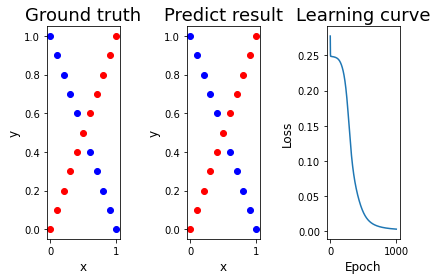

XOR problem , epochs = 1000 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = default
epoch  0  loss  [0.37833677]
epoch  10  loss  [0.20569217]
epoch  20  loss  [0.10037127]
epoch  30  loss  [0.06365311]
epoch  40  loss  [0.04291872]
epoch  50  loss  [0.03259889]
epoch  60  loss  [0.02619281]
epoch  70  loss  [0.0211309]
epoch  80  loss  [0.01789312]
epoch  90  loss  [0.01602095]
epoch  100  loss  [0.01491778]
epoch  110  loss  [0.01422981]
epoch  120  loss  [0.01374988]
epoch  130  loss  [0.0133676]
epoch  140  loss  [0.01304138]
epoch  150  loss  [0.01275798]
epoch  160  loss  [0.01250971]
epoch  170  loss  [0.01228995]
epoch  180  loss  [0.01209318]
epoch  190  loss  [0.01191505]
learn problem

accuracy is  0.97


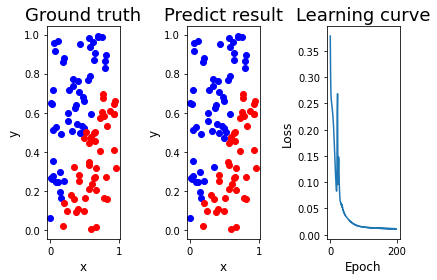

Linear problem , epochs = 200 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = 100


In [ ]:
def prediction(network,input):
  Y = []
  for x in input:
    #print(x)
    Y.append(sigmoid(network.forward(x)[-1]))
  return Y

def presentation(mode,epochs,hidden_layer1_dim, hidden_layer2_dim,act_fun,n=100): #mode 0 = xor , mode 1 = linear
  if mode:
    X , ground_truth = generate_linear(n)
    mod = 10
  else:
    X , ground_truth = generate_XOR_easy()
    mod = 10

  num_data , input_dim = X.shape
  network = Network(input_dim,1,hidden_layer1_dim, hidden_layer2_dim,act_fun)
  model_total_loss = []
  for epoch in range(epochs):
    activations = network.forward(X)
    z = activations[-1]
    y = sigmoid(z)
    
    loss = MSE( y, ground_truth)
    grad_input =  derivative_sigmoid(z) * gradient_MSE( y, ground_truth)
    
    network.backward( activations, grad_input)
    model_total_loss.append(loss)
    if (epoch % mod) == 0:
      print("epoch ",epoch," loss ",loss)

  Y = prediction(network,X)

  if mode:
    print("learn problem\n")
  else:
    print("XOR problem")
  
  correct_prediction = 0
  for i in range(len(Y)):
    if np.around(Y[i]) == ground_truth[i]:
      correct_prediction = correct_prediction + 1

  accuracy = correct_prediction / len(Y)
  print("accuracy is ",accuracy)
  show_result(X,ground_truth,np.around(Y),model_total_loss)
  
# mode,epochs,hidden_layer1_dim, hidden_layer2_dim,activations,n=100
# mode 0 = xor , mode 1 = linear
presentation(0,1000,10,5,1)
print('XOR problem , epochs = 1000 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = default')
#XOR problem , epochs=200 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = relu , n = default 
presentation(1,200,10,5,1,100)
print('Linear problem , epochs = 200 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = 100')
#Linear problem , epochs=200 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = 100

epoch  0  loss  [0.27618632]
epoch  10  loss  [0.24817154]
epoch  20  loss  [0.12690466]
epoch  30  loss  [0.08808129]
epoch  40  loss  [0.05838592]
epoch  50  loss  [0.05720606]
epoch  60  loss  [0.02568]
epoch  70  loss  [0.01677179]
epoch  80  loss  [0.01158616]
epoch  90  loss  [0.00743302]
epoch  100  loss  [0.00552305]
epoch  110  loss  [0.0042741]
epoch  120  loss  [0.0033962]
epoch  130  loss  [0.00276966]
epoch  140  loss  [0.0023143]
XOR problem
accuracy is  1.0


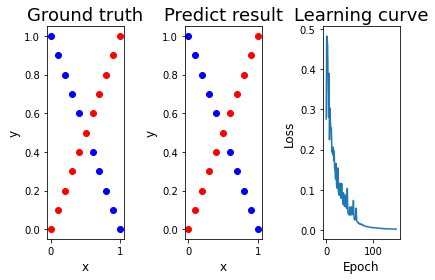

XOR problem , epochs = 1000 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = default
epoch  0  loss  [0.27101073]
epoch  10  loss  [0.14065602]
epoch  20  loss  [0.12562204]
epoch  30  loss  [0.11466283]
epoch  40  loss  [0.10601639]
learn problem

accuracy is  0.94


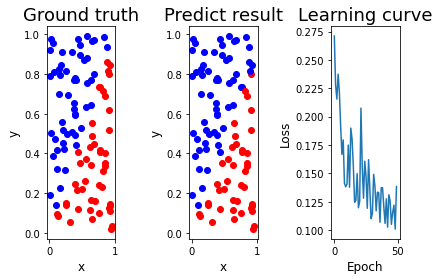

Linear problem , epochs = 200 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = 100


In [ ]:
# mode,epochs,hidden_layer1_dim, hidden_layer2_dim,activations,n=100
# mode 0 = xor , mode 1 = linear
presentation(0,150,10,5,0)
print('XOR problem , epochs = 1000 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = default')
#XOR problem , epochs=200 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = relu , n = default 
presentation(1,50,10,5,0,100)
print('Linear problem , epochs = 200 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = 100')
#Linear problem , epochs=200 , hidden_layer1_dim = 10 , hidden_layer2_dim = 5 , act_fun = sigmoid , n = 100